<a href="https://colab.research.google.com/github/dinggga/super-broccoli/blob/main/220314hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념 정리]**

# **CH3 분류**

## **3.1 MNIST**

**MNIST 데이터셋**: 70000의 손글씨 숫자 이미지

*데이터 읽어들일 때  'as_frame=False' 덧붙여야 함. 책이 낮은 버전이라 그대로 하면 Key Error남.
* X는 matplotlib의 imshow() 함수로 그림. y는 문자열인데 정수로 변환.




## **3.2 이진 분류기 훈련**

**확률적 경사 하강법 (SGD) 분류기**
- 사이킷런의 SGDClassifier 클래스 이용. 한번에 하나씩 훈련 샘플을 독립적으로 처리. 무작위성.

## **3.3 성능 측정**

### **3.3.1 교차 검증을 사용한 정확도 측정**
**cross_val_score()**: k개 폴드로 나누고, 각 폴드에 대해 예측, 평가하기 위해 나머지 폴드로 훈련시킨 모델 사용

**StratifiedKFold()**: 클래스별 비율 유지되도록 폴드 만들기 위해 계층적 샘플링 수행. 매 반복에서 분류기 객체 복제해 훈련 폴드로 훈련, 테스트 폴드로 예측 만듦.

### **3.3.2 오차 행렬**

**오차 행렬**: 클래스 A의 샘플이 클래스 B로 분류된 횟수 세는 것.
- confusion_matrix() 함수
- 행: 실제 클래스, 열: 예측한 클래스
- 진양성 TP, 위양성 FP, 진음성 TN, 위음성 FN

*cross_val_predict() 함수 이용하여 예측값 먼저 만들기
- cross_val_predict() 함수: k-겹 교차 검증 수행하지만 평가 점수 반환 않고 각 테스트 폴드에서 얻은 예측 반환.

**정밀도**: 양성 예측의 정확성 TP/(TP+FP). precision_score() 함수

**재현율**(민감도, 진양성비율 TPR): 분류기가 정확하게 감지한 양성 샘플 비율 TP/(TP+FN). recall_score() 함수




### **3.3.3 정밀도와 재현율**

**F1 score**: 정밀도와 재현율의 조화 평균 2/(1/정밀도+1/재현율). f1_score() 함수

### **3.3.4 정밀도/재현율 트레이드오프**

SGDClassifier: 결정함수 사용, **결정 임곗값 조정**해서 정밀도/재현율 조정 (임곗값 내리면 재현율 업 정밀도 다운)

**decision_function()** 메서드로 얻은 각 샘플 점수 기반으로 원하는 임곗값 정하고 예측

적절한 임곗값: cross_val_predict() 함수로 모든 샘플 점수 구하고 > precision_recall_curve() 함수로 모든 임계값에 대해 정밀도/재현율 계산

### **3.3.5 ROC 곡선**

**ROC 곡선**: 위양성비율FPR에 대한 진양성비율TPR의 곡선, 민감도에 대한 1-특이도 그래프.ROC 점선에서 멀수록 좋은 분류. roc_curve() 함수

**AUC** (곡선 아래 면적): 1에 가까울수록 좋음

*정밀도/재현율(PR) 곡선: 양성 클래스 드물거나 위음성보다 위양성이 더 중요할 때 씀

RandomForestClassifier - predict_proba() 메서드

## **3.4 다중 분류**

SDG/랜덤 포레스트/나이브 베이즈 분류기 등: 여러 클래스 직접 처리 가능
<> 로지스틱 회귀/서포트 벡터 머신 분류기 등: 이진 분류만 가능. but 이진 분류기 여러개 사용해 다중 클래스 분류 기법 존재.

**OvR 전략**(one-versus-the-rest, OvA one-versus-all): OneVsRestClassifier

**OvO 전략**(one-versus-one): N개 클래스 -> 분류기 N(N-1)/2 개 통과해 가장 많이 양성 분류된 클래스 선택. OneVsOneClassifier

sklearn.svm.SVC 클래스: 서포트 벡터 머신 분류기

decision_function() 메서드: 샘플당 점수 반환


## **3.5 에러 분석**

**오차 행렬**

- cross_val_predict() 함수 사용해 예측 만들고 confusion_matrix() 함수 호출, matshow() 함수 사용해 이미지로 표현 
- 에러 비율(오차행렬 각 값/대응되는 클래스 이미지 개수) 비교, 주대각선만 0으로 채워 그래프 채움 -> 에러 보임

## **3.6 다중 레이블 분류**

**다중 레이블 분류 시스템**: 여러 개의 이진 꼬리표를 출력하는 분류 시스템

- 평가 방법 다양 (예시_f1 score)



## **3.7 다중 출력 분류**

**다중 출력 다중 클래스 분류**: 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것.
- ex_ 이미지 잡음 제거 시스템

---------------------

# **[필사]**

**3.1 MNIST**

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


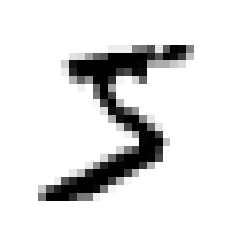

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [4]:
y[0]

'5'

In [5]:
import numpy as np
y = y.astype(np.uint8)

In [6]:
# 훈련세트/데이터세트 나누기
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**3.2 이진 분류기 훈련**

In [7]:
# '5-감지기' 분류 작업을 위한 타깃 벡터 만들기
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
# SGD 이용
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

**3.3 성능 측정**

3.3.1 교차 검증을 사용한 정확도 측정

In [10]:
# 교차 검증 기능 직접 구현
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))

0.9669
0.91625
0.96785


In [11]:
# cross_val_score() 함수로 폴드 3개인 k-겹 교차 검증 사용해 모델 평가
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [12]:
# 더미 분류기 만들기
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [13]:
# 모델 정확도 추출
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

3.3.2 오차 행렬

In [14]:
# 예측값 먼저 만들기
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix
a= confusion_matrix(y_train_5, y_train_pred)
print(a)

[[5915 6663 5976 5314 6132 1340 6045 5941 5633 5620]
 [  68   23   58  150   83 4606  174   26  152   81]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


In [16]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

3.3.3 정밀도와 재현율

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred, average='micro')

0.09896666666666666

In [18]:
recall_score(y_train_5, y_train_pred, average='micro')

0.09896666666666666

In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred, average='micro')

0.09896666666666666

3.3.4 정밀도/재현율 트레이드오프

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [21]:
threshold=0
y_some_digit_pred = (y_scores > threshold)

In [22]:
# 임곗값 높임
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [23]:
# 적절한 임계값 찾기
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--')
  plt.plot(thresholds, recalls[:-1], 'g-')
  [...]

  plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
  plt.show()